1. Joe Spectrograph studies the star Gliese 33 = HD 4628. He has heard that an exoplanet has been discovered around this star, due to radial velocities which follow this ephemeris: 

\begin{equation}
RV(t) = \frac{K}{P} \cos(2\pi(t-T)) + v_{sys}
\end{equation}

# a. What is the value of vsys for this star?


According to Nidever et al. (2002), the K2.5V star HD 4628 has (barycentric) RV=-10230 m/s
as observed on $t$ = 9262-2440000 (JD).

Thus, $v_{sys}$ can be derived as:

In [13]:
#systemic velocity of the star
vsys = -10230          #star: m/s

#Nidever et al. 2002 measured vsys(=RV) at time t_ave of the observation.
t_ave    = 9262+2440000    #JD

# #2440000: May 23, 1968 at 12:00
# #2457083.15992: Mar 1, 2015 at 15:50:17

Refrences:
[1] Simbad result: 10140 m/s;http://simbad.u-strasbg.fr/simbad/sim-basic?Ident=HD+4628&submit=SIMBAD+search
[2] Nidever et al. ApJ SS, 141:503–522, 2002
http://iopscience.iop.org/article/10.1086/340570/pdf

Primary Name, JD(-2440000), $\Delta$T (days), RV (m/s)
HD 4628, 9262, 3747, 10230

# b. What is the mass of this star?

Can't use this conservation of momentum: M_star*vsys=M_planet*v_planet since mass of planet is not yet known.
Can't use 
K = 203.*(P**(-1./3.))*((M_p/M_Jup)/(((M_star/M_sun)+9.548E-4*(M_p/M_Jup))**(2./3.)))
because this is for K of the planet, not the star.

In [14]:
M_sun = 1.989E30
M_star = 0.7 * M_sun

# c. Make a graph showing the radial velocity predicted by this formula over three consecutive cycles

Populating the interactive namespace from numpy and matplotlib


/home/dl/miniconda2/envs/transit/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['power']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


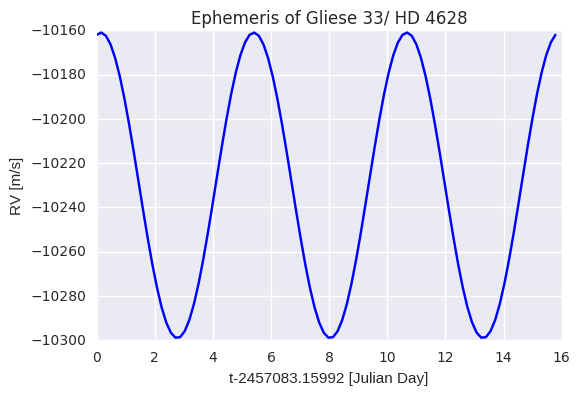

In [15]:
import numpy as np
from matplotlib import pyplot as plt
%pylab inline

T    = 2457083.15992   #Julian Date
P    = 5.2616          #period in days
K    = 69              #m/s
vsys = -10230          #according to [2]

t = np.linspace(0,3*P,100) #3 cycles in days
RV = []
for i in t:
    RV_i= K * np.cos(2*np.pi*(i-T)/P) + vsys
    RV.append(RV_i)
    
plt.plot(t,RV,'b-');
plt.xlabel('t-2457083.15992 [Julian Day]');
plt.ylabel('RV [m/s]');
plt.title('Ephemeris of Gliese 33/ HD 4628');

Joe uses his telescope, in Rochester, NY, to measure the spectrum of this star on the following nights: **Oct 1, 2, 7, 9, 12, all in 2015**. On each night, he measures the spectrum three times: at **10 PM, midnight, and 2 AM**, each time with an exposure time of **10 minutes**. He calibrates his spectrum against a neon-helium lamp inside the dome each time.

# Bonus! Make a graph showing the radial velocities Joe will measure from his spectra, relative to the lamp in the dome.

2457083.15992: Mar 1, 2015 at 15:50:17; should I add t=(date in JD-T)

In [16]:
import pandas as pd

time=pd.Series(['10/1 22:00', '10/1 02:00', '10/1 24:00', '10/2 22:00', '10/2 02:00', '10/2 24:00', '10/7 22:00', '10/7 02:00', '10/7 24:00', '10/9 22:00', '10/9 02:00', '10/9 24:00', '10/12 22:00', '10/12 02:00', '10/12 24:00'])
JD=pd.Series([2457297.25, 2457296.4166667, 2457297.3333333, 2457298.25, 2457297.4166667, 2457298.3333333, 2457303.25, 2457302.4166667, 2457303.3333333, 2457305.25, 2457304.4166667, 2457305.3333333, 2457308.25, 2457307.4166667, 2457308.3333333])
obs=pd.DataFrame(time)
obs['JD']=pd.DataFrame(JD)
obs.columns=['time','JD']
obs.head()

,time,JD
0,10/1 22:00,2.457297e+06
1,10/1 02:00,2.457296e+06
2,10/1 24:00,2.457297e+06
3,10/2 22:00,2.457298e+06
4,10/2 02:00,2.457297e+06


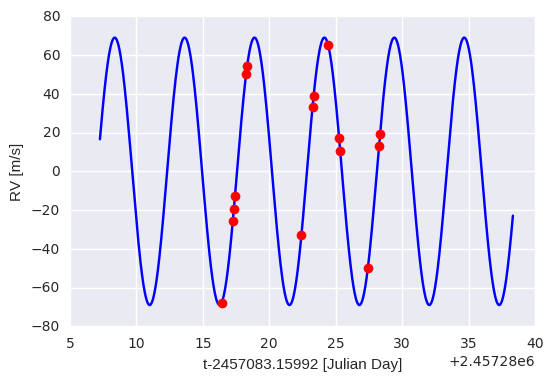

In [17]:
t_pred = obs.JD
t = np.linspace(t_pred[0]-10,t_pred[14]+10,1000) #3 cycles in days

RV = []
for i in t:
    RV_i= K * np.cos(2*np.pi*(i-T)/P) #+ vsys
    RV.append(RV_i)
    
RV_pred = []
for i in t_pred:
    RV_i= K * np.cos(2*np.pi*(i-T)/P)
    RV_pred.append(RV_i)

plt.plot(t,RV,'b-')
plt.plot(obs.JD,RV_pred,'ro');
plt.xlabel('t-2457083.15992 [Julian Day]');
plt.ylabel('RV [m/s]');
#plt.title('Ephemeris of Gliese 33/ HD 4628');

# d. What is the distance of this planet from its host star?

Using Kepler's 3rd law, #can't use this because planet mass is assumed to be M_planet << M_star.

In [18]:
G= 6.67E-11
au = 1.496E11 #in meters
M_planet = 0 #minimum?

a = ((G*(M_star+M_planet)*(P*60*60*24)**2)/(4*np.pi**2))**(1/3)
print("Semi-major axis= {0:.3} m or {1:.3} AU".format(a, a/au))

Semi-major axis= 7.86e+09 m or 0.0526 AU


# e. What is the mass of the planet?

We can compute the $V_{\rm{planet}}$ using

In [7]:
v_planet = 2*np.pi*a/(P*60*60*24)
print("v_planet= {} m/s".format(v_planet))

v_planet= 108676.50203612618 m/s


And hence, $M_{\rm{planet}}$ can be computed from

In [8]:
M_planet=M_star*abs(vsys)/v_planet
M_Jup = 1.898E27 # in kg
M_Earth = 5.972E24
print("M_planet= {0:.3} kg or {1:.3} M_Jup or or {2:.3} M_Earth".format(M_planet, M_planet/M_Jup, M_planet/M_Earth))

M_planet= 1.31e+29 kg or 69.1 M_Jup or or 2.19e+04 M_Earth


Assuming $e$=0 and $i=\pi/2$, ...

Joe figures out that he should use standard stars to remove most of the radial velocity variations due to the Earth's rotation and orbital motion. He modifies his procedures and now produces nice tables of radial velocities which show only the change due to the star's own motion.
The following three questions are based on his observations of new objects -- NOT the same as the star in Question 1.

# 2. 
Over a period of several years, Joe measures the radial velocity of one particular star. He sees pretty clear evidence for an exoplanet.

**Hint: the periods in the questions below should all be in the range of 1 - 20 days. If you are using a tool to find the period, it is a good idea to search using a step size <= 0.01 days**

## a. What is the period of variations in this star's radial velocities?

In [9]:
# url = 'http://spiff.rit.edu/classes/extrasol/homework/hw_4/rv_2.dat'
# req = urllib.request.Request(url)
# with urllib.request.urlopen(req) as response:
#    html = response.read()

# outpath = 'RV_2_{}.dat'.format(time.strftime("%Y%m%d")) #include date of download

# print("retrieving URL: {}".format(url))

# with open(outpath,'wb') as f:
#      f.write(html)
# print("created file: {}".format(outpath))

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%pylab inline

filename='rv_2.dat'
df = pd.read_csv(filename,delim_whitespace=True)# error_bad_lines=False, skiprows=?
df.tail()

Populating the interactive namespace from numpy and matplotlib


,HJD,RV,error
53,2.455315e+06,-7.31,4.17
54,2.455315e+06,-21.09,4.24
55,2.455315e+06,-28.12,4.36
56,2.455315e+06,-20.81,3.86
57,2.455315e+06,-41.51,4.05


In [2]:
len(df)

58

/home/dl/miniconda2/envs/transit/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


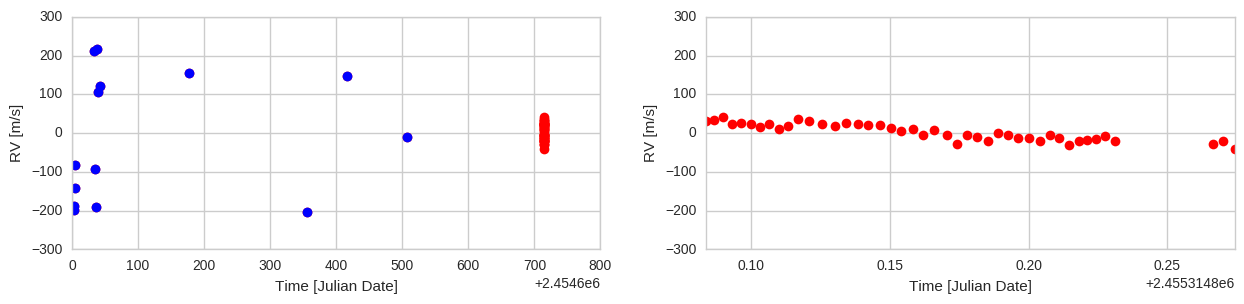

In [3]:
#fig, ax = plt.subplots()
#df.plot(yerr=df.error, ax=ax, kind='scatter')
import seaborn as sb

t=df.HJD 
RV=df.RV
cutoff = 14
with sb.axes_style('whitegrid'):
    fig, ax = plt.subplots(1,2,figsize=(15,3))
    ax[0].plot(t,RV,'ro')
    ax[0].plot(t[:cutoff],RV[:cutoff], 'bo')
    ax[0].set_xlabel('Time [Julian Date]')
    ax[0].set_ylabel('RV [m/s]')
    ax[1].plot(t,RV,'ro');
    ax[1].set_xlim([t[cutoff],t[len(df)-1]]) #take the 
    ax[1].set_xlabel('Time [Julian Date]');
    ax[1].set_ylabel('RV [m/s]');

To compute the period, we need to fit a curve first.

In [4]:
import gatspy
from gatspy.periodic import LombScargleFast

t, f = t, df.RV   
f /= np.median(f)                 #normalize

model = LombScargleFast().fit(t, f)
periods, power = model.periodogram_auto(nyquist_factor=100)

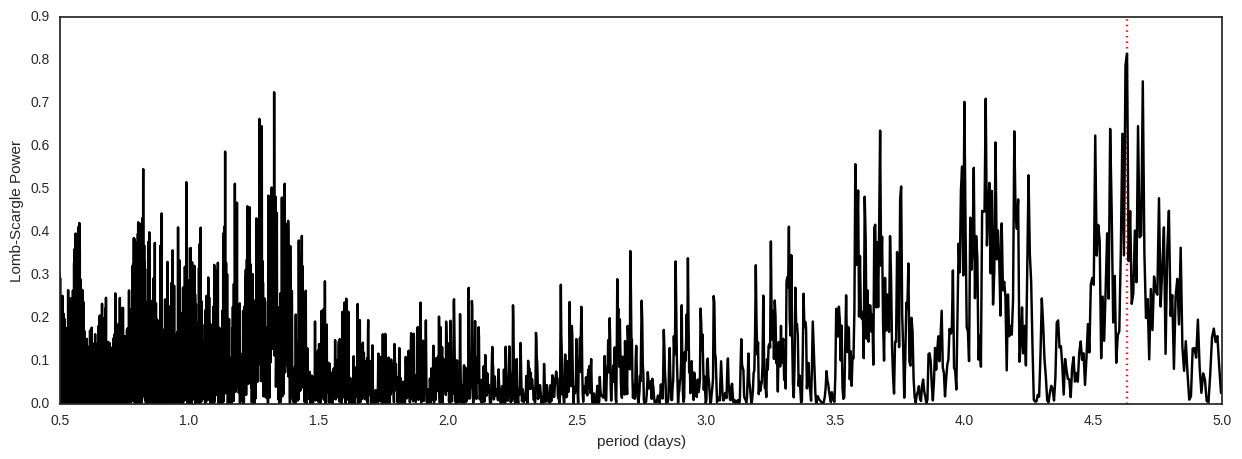

In [5]:
idx1 = periods > 1
idx2 = np.argmax(power[idx1])
peak = periods[idx1][idx2]

with sb.axes_style('white'):
    fig, ax = plt.subplots(1,1,figsize=(15,5))
    ax.plot(periods, power, 'k-')
    ax.set(xlim=(0.5, 5),
       xlabel='period (days)',
       ylabel='Lomb-Scargle Power')
    ax.vlines(peak, *ax.get_ylim(), linestyles='dotted', colors='r')

In [6]:
print("Period is {0:.3} days".format(peak))

Period is 4.63 days


The periodogram shows low frequency noise due to bunch of datapoints towards the end of observation that have less than 1 period. Let's remove these datapoints, leaving only only the first 10, and make another periodogram to check if the same period is dominant.

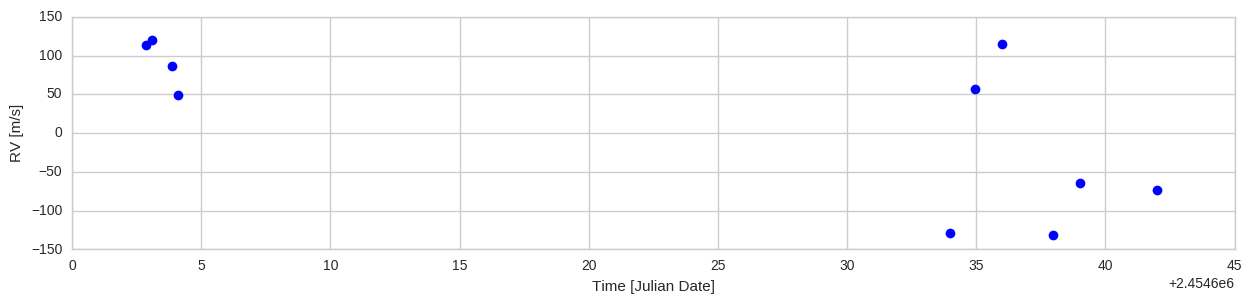

In [20]:
lower_cutoff=10
t1, RV1, err1 = t[:lower_cutoff],RV[:lower_cutoff], df.error[:lower_cutoff]
with sb.axes_style('whitegrid'):
    fig, ax = plt.subplots(1,1,figsize=(15,3))
    ax.plot(t1, RV1,'bo');
    ax.errorbar(t1,RV1,yerr=err1, linestyle="None") #error bars smaller than the datapoints
    ax.set_xlabel('Time [Julian Date]');
    ax.set_ylabel('RV [m/s]');

In [21]:
import gatspy
from gatspy.periodic import LombScargleFast

model = LombScargleFast().fit(t1, RV1)
periods, power = model.periodogram_auto(nyquist_factor=100)

/home/dl/miniconda2/envs/transit/lib/python3.5/site-packages/gatspy/periodic/lomb_scargle_fast.py:429: UserWarning: For smaller datasets, the approximation used by LombScargleFast may not be suitable.
It is recommended to use LombScargle instead.
To silence this warning, set ``silence_warnings=True``
  warnings.warn("For smaller datasets, the approximation used by "


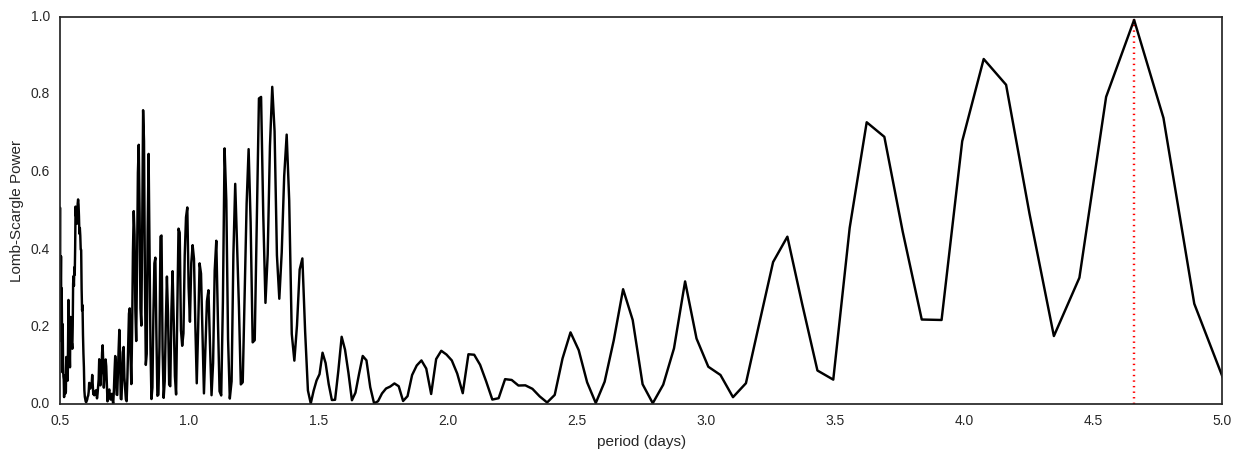

In [22]:
idx1 = periods > 1
idx2 = np.argmax(power[idx1])
peak = periods[idx1][idx2]

with sb.axes_style('white'):
    fig, ax = plt.subplots(1,1,figsize=(15,5))
    ax.plot(periods, power, 'k-')
    ax.set(xlim=(0.5, 5),
       xlabel='period (days)',
       ylabel='Lomb-Scargle Power')
    ax.vlines(peak, *ax.get_ylim(), linestyles='dotted', colors='r')

Indeed, the same dominant period becomes more apparent even with sparse datapoints. Note that low frequency noise is minimized.

In [23]:
print("Period is {0:.3} days".format(peak))

Period is 4.66 days


Then, let's optimize the fitting parameters.

In [24]:
import scipy.optimize as opt
#opt.minimize?

K = max(RV1)+10
def simple_cos(theta, x):
    K, P, phi = theta
    return K*np.cos(2*np.pi*(x-phi)/P)

def objective(theta, xi, yi):
    model = simple_cos(theta, xi)
    return np.sum((model - yi)**2) #res**2

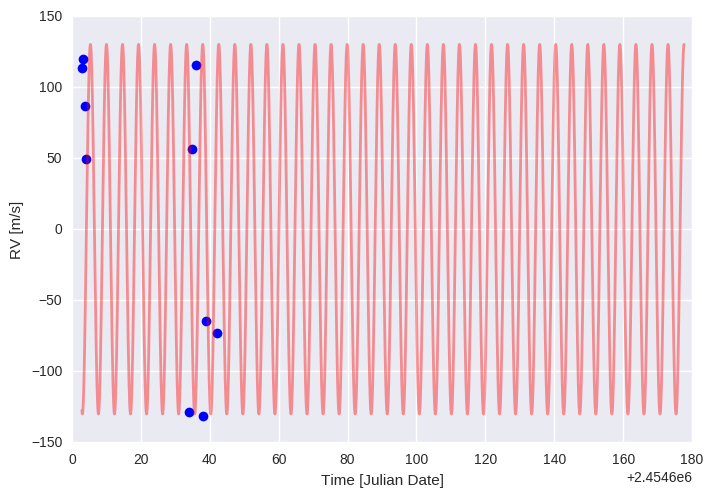

In [25]:
P=peak
init_guess = [K,P,0] #K,P,phi

x = np.arange(t[0],t[lower_cutoff],0.01)
plt.plot(t1,RV1,'bo');
plt.plot(x, simple_cos(init_guess, x),'r-', lw=2, alpha=0.4)
plt.xlabel('Time [Julian Date]');
plt.ylabel('RV [m/s]');

Fit seems a little off in phase.

In [26]:
optimize = opt.minimize(objective, init_guess, args=(t1,RV1), method='nelder-mead')
optimize

 final_simplex: (array([[  1.25135068e+02,   4.79005733e+00,   9.59719186e-05],
       [  1.25135068e+02,   4.79005733e+00,   9.59719187e-05],
       [  1.25135068e+02,   4.79005733e+00,   9.59719187e-05],
       [  1.25135068e+02,   4.79005733e+00,   9.59719184e-05]]), array([ 34391.73527604,  34391.73529954,  34391.73531291,  34391.73533395]))
           fun: 34391.73527603953
       message: 'Optimization terminated successfully.'
          nfev: 194
           nit: 88
        status: 0
       success: True
             x: array([  1.25135068e+02,   4.79005733e+00,   9.59719186e-05])

In [27]:
for i in optimize.x: #x is the result of opt.minimize
    print('Success={}'.format(optimize.success))
    print("parameter optimum: {}".format(i))

Success=True
parameter optimum: 125.13506821182133
Success=True
parameter optimum: 4.790057329612633
Success=True
parameter optimum: 9.597191860272266e-05


Re-plot using optimized values.

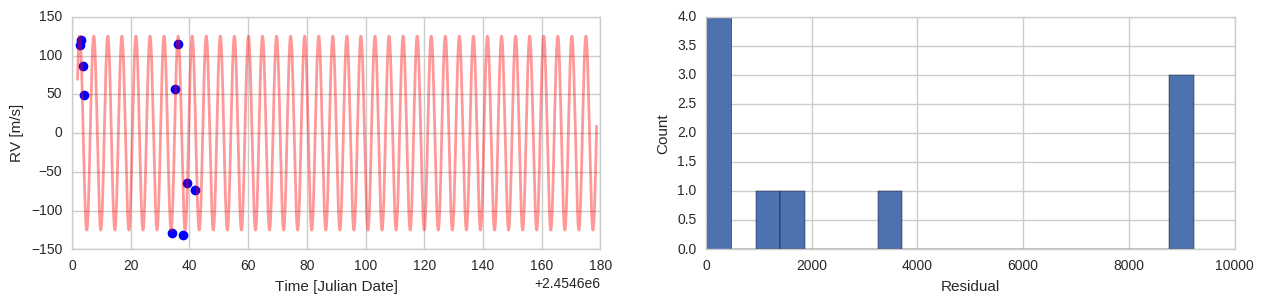

In [28]:
new_guess = []

for i in optimize.x:
    new_guess.append(i)

x = np.arange(t[0]-1,t[lower_cutoff]+1,0.01)

res=[]
for i,j in zip(t1,RV1): 
    res.append(np.sum(simple_cos(new_guess, i)-j)**2)
             
with sb.axes_style('whitegrid'):
    fig, ax = plt.subplots(1,2,figsize=(15,3))
    ax[0].plot(t1,RV1,'bo')
    ax[0].plot(x, simple_cos(new_guess, x),'r-', lw=2, alpha=0.4)
    ax[0].set_xlabel('Time [Julian Date]')
    ax[0].set_ylabel('RV [m/s]')
    ax[1].hist(res,bins=20)
    ax[1].set_xlabel('Residual')
    ax[1].set_ylabel('Count')

To double check, we use a different optimizer.

In [29]:
phi=new_guess[2] #optimize.x[2]
y_noisy= K * np.sin(2*np.pi*(x-phi)/P)

In [30]:
#create a function identical to simple_sine
#mapping/copying of simple_sine to h
h = lambda x,V,P,phi: K * np.cos(2*np.pi*(x-phi)/P)

p_opt, p_cov = opt.curve_fit(h, t1, RV1, p0=new_guess)
var = np.diag(p_cov)
std = np.sqrt(np.diag(p_cov)) #a.k.a. sigma

# for i,j in zip(p_opt, std):
#     print ("parameter optimum: {} +/- {}".format(i, j))

print ("optimum: K={0} m/s; P={1} d; phi={2}".format(p_opt[0],p_opt[1],p_opt[2]))

optimum: K=125.13506821182133 m/s; P=4.790057326459369 d; phi=9.597191860272266e-05


/home/dl/miniconda2/envs/transit/lib/python3.5/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


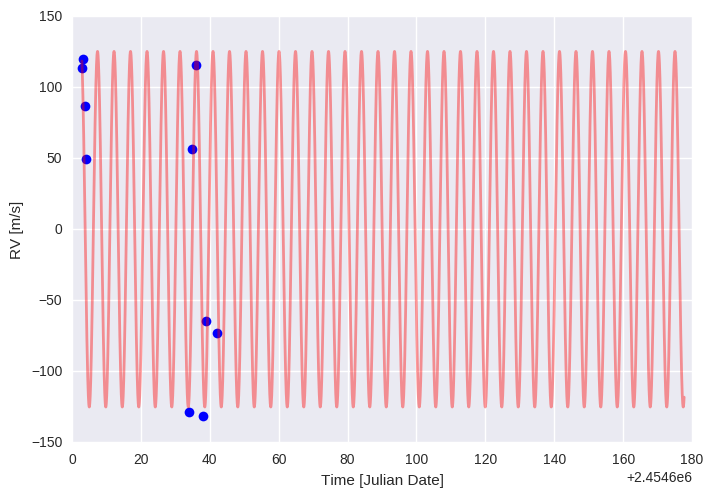

In [31]:
newer_guess = []
for i in p_opt:
    newer_guess.append(i)

x = np.arange(t[0],t[lower_cutoff],0.01)
plt.plot(t1,RV1,'bo');
plt.plot(x, simple_cos(newer_guess, x),'r-', lw=2, alpha=0.4)
plt.xlabel('Time [Julian Date]');
plt.ylabel('RV [m/s]');

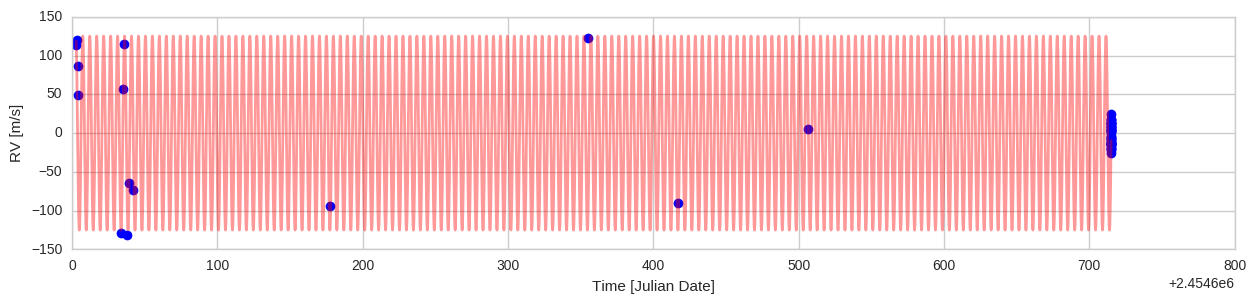

In [32]:
x = np.arange(t[0],t[57],0.01)
with sb.axes_style('whitegrid'):
    fig, ax = plt.subplots(1,1,figsize=(15,3))
    ax.plot(t, RV,'bo')
    ax.plot(x, simple_cos(newer_guess, x),'r-', lw=2, alpha=0.4)
    ax.errorbar(t1,RV1,yerr=err1, linestyle="None") #error bars smaller than the datapoints
    ax.set_xlabel('Time [Julian Date]')
    ax.set_ylabel('RV [m/s]')
# with sb.axes_style('whitegrid'):
#     fig, axs = plt.subplots(1,1,figsize=(15,3))
#     axs.plot(t,RV,'bo');
#     axs.plot(x, simple_cos(newer_guess, x),'r-', lw=2, alpha=0.4)
#     axs.set_xlim([t[cutoff],t[len(df)-1]]) #take the 
#     axs.set_xlabel('Time [Julian Date]');
#     axs.set_ylabel('RV [m/s]');

In [33]:
print("The optimum period is P= {} m/s".format(optimize.x[1]))

The optimum period is P= 4.790057329612633 m/s


In [34]:
print("The difference in the computed periods ({} m/s) using the two optimizers is small.".format(optimize.x[1]-p_opt[1]))

The difference in the computed periods (3.1532643163245666e-09 m/s) using the two optimizers is small.


## b. Assuming that this is a Sun-like star, what is the orbital radius and mass of the planet?

Because the mass of the planet is unknown yet, we can use the semi-amplitude equation to derive/obtain M_planet and then use the Kepler's equation to calculate the planet's orbit. Instead, use semi-amplitude equation to derive M_planet and then use Kepler's third law to compute planet's orbit.

In [74]:
G= 6.67E-11
M_sun= 1.989E30 # in kg
M_Jup = 1.898E27 # in kg
M_Earth = 5.972E24
M_star = M_sun
au = 1.496E11 #in meters

P=optimize2.x[1]
v_star=optimize2.x[0]

M_0= 0

a = ((G*(M_star+M_0)*(P*60*60*24)**2)/(4*np.pi**2))**(1/3)
print("Semi-major axis= {0:.3} m or {1:.3} AU".format(a, a/au))

v_planet = 2*np.pi*a/P
print("v_planet= {0:.3} m/s".format(v_planet))
M_planet=M_star*abs(v_star)/v_planet

print("M_planet= {0:.3} kg or {1:.3} M_Jup or or {2:.3} M_Earth".format(M_planet, M_planet/M_Jup, M_planet/M_Earth))

NameError: name 'p_opt' is not defined

## c. Bonus! This is a real exoplanet. Which one?

# 3. 
Joe finds another star with RV variations. These are less obvious. 

## a. What is the period of variations in this star's radial velocities?

In [19]:
import pandas as pd
from matplotlib import pyplot as plt
%pylab inline

filename='rv_3.dat'
df2 = pd.read_csv(filename,delim_whitespace=True)# error_bad_lines=False, skiprows=?

df2.columns=['t','RV','err']

t2, RV2, err2 = df2.t, df2.RV*1000, df2.err*1000
df2.head()

Populating the interactive namespace from numpy and matplotlib


,t,RV,err
0,2.454434e+06,-1.50827,0.00450
1,2.454435e+06,-1.59145,0.00420
2,2.454436e+06,-1.69089,0.00454
3,2.454440e+06,-1.37548,0.00698
4,2.454441e+06,-1.39927,0.00411


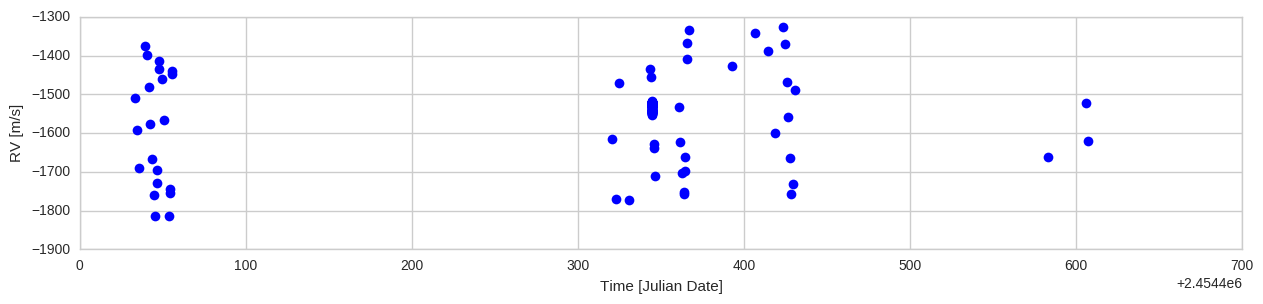

In [20]:
import seaborn as sb

with sb.axes_style('whitegrid'):
    fig, ax = plt.subplots(1,1,figsize=(15,3))
    ax.plot(t2, RV2,'bo');
    ax.errorbar(t2,RV2,yerr=err2, linestyle="None") #error bars smaller than the datapoints
    ax.set_xlabel('Time [Julian Date]');
    ax.set_ylabel('RV [m/s]');

In [21]:
import gatspy
from gatspy.periodic import LombScargleFast
  
#RV2 /= np.median(df2.RV)                 #normalize

model = LombScargleFast().fit(t2, RV2)
periods, power = model.periodogram_auto(nyquist_factor=100)

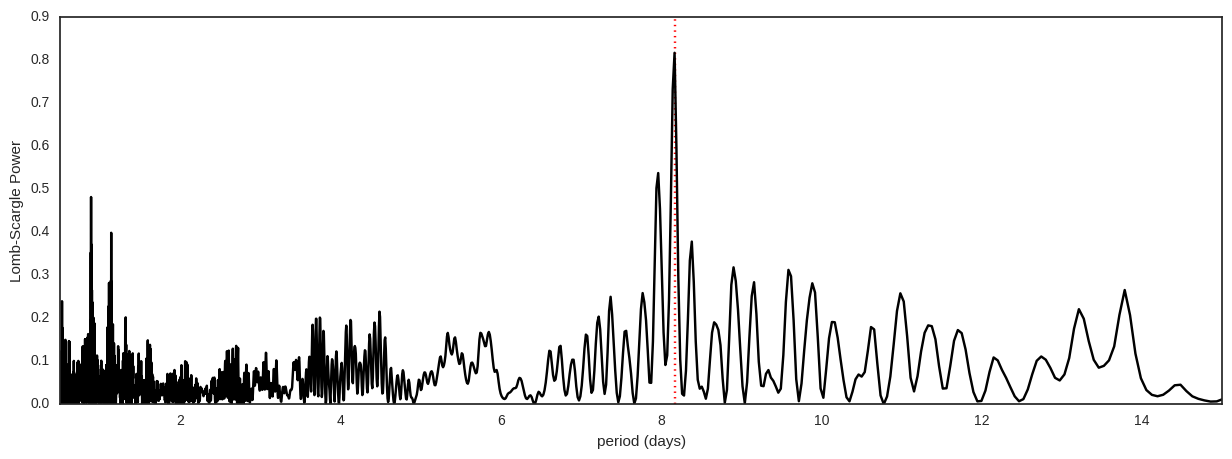

In [22]:
idx1 = periods > 1
idx2 = np.argmax(power[idx1])
peak2 = periods[idx1][idx2]

with sb.axes_style('white'):
    fig, ax = plt.subplots(1,1,figsize=(15,5))
    ax.plot(periods, power, 'k-')
    ax.set(xlim=(0.5, 15),
       xlabel='period (days)',
       ylabel='Lomb-Scargle Power')
    ax.vlines(peak2, *ax.get_ylim(), linestyles='dotted', colors='r')

In [23]:
print("Period is {0:.3} days".format(peak2))

Period is 8.17 days


Let's mask the red data points and check the periodogram again.

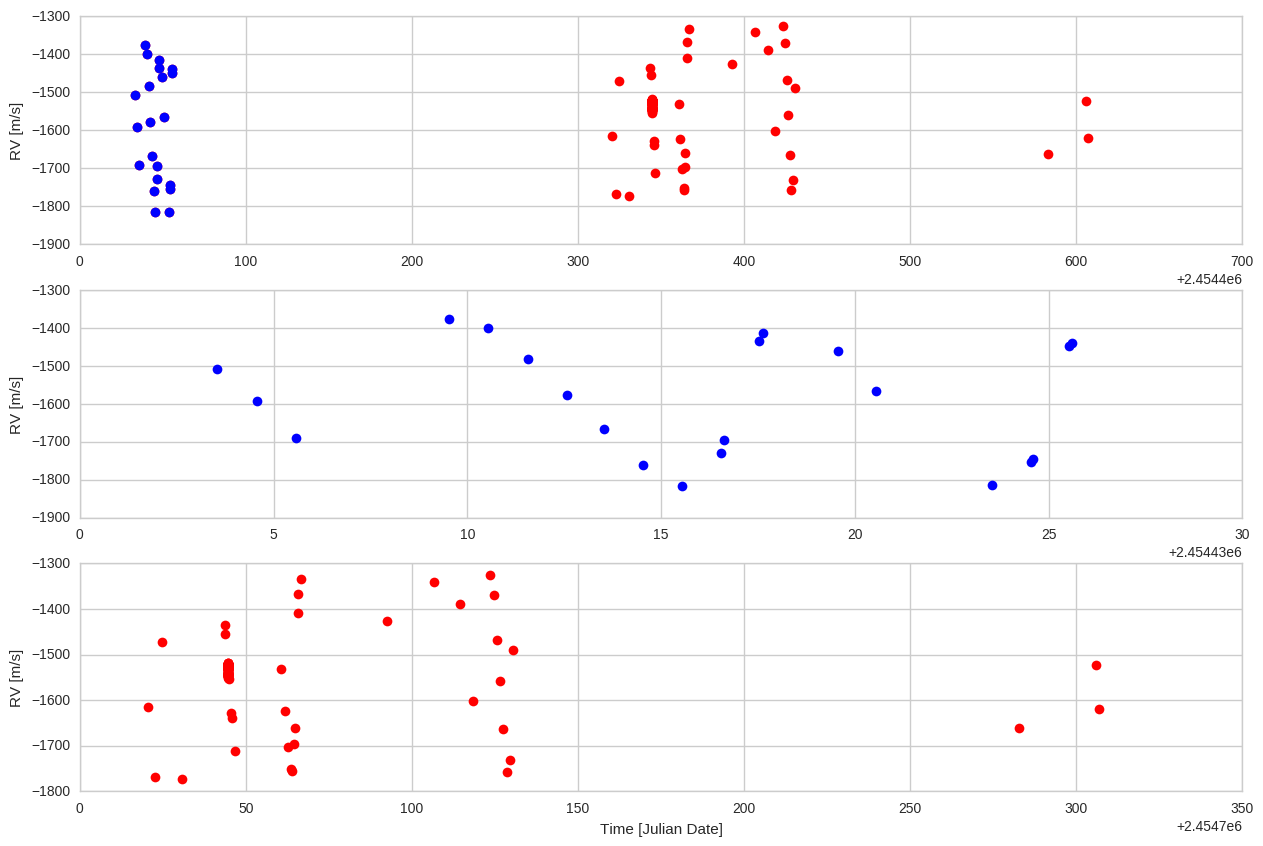

In [24]:
#fig, ax = plt.subplots()
#df.plot(yerr=df.error, ax=ax, kind='scatter')

cutoff2 = 21
t2a, RV2a, err2a = t2[:cutoff2],RV2[:cutoff2], err2[:cutoff2]

with sb.axes_style('whitegrid'):
    fig, ax = plt.subplots(3,1,figsize=(15,10))
    ax[0].plot(t2,RV2,'ro')  #all data
    ax[0].plot(t2a,RV2a, 'bo') #color t2a and RV2a as blue
    #ax[0].set_xlabel('Time [Julian Date]')
    ax[0].set_ylabel('RV [m/s]')
    ax[1].plot(t2a,RV2a, 'bo') #Zoom the blue datapoints
    #ax[1].set_xlabel('Time [Julian Date]');
    ax[1].set_ylabel('RV [m/s]');
    ax[2].plot(t2[cutoff2:],RV2[cutoff2:],'ro');
    #ax[2].set_xlim([t2[cutoff2],t2[len(df2)-1]]) #take the 
    ax[2].set_xlabel('Time [Julian Date]');
    ax[2].set_ylabel('RV [m/s]');

/home/dl/miniconda2/envs/transit/lib/python3.5/site-packages/gatspy/periodic/lomb_scargle_fast.py:429: UserWarning: For smaller datasets, the approximation used by LombScargleFast may not be suitable.
It is recommended to use LombScargle instead.
To silence this warning, set ``silence_warnings=True``
  warnings.warn("For smaller datasets, the approximation used by "


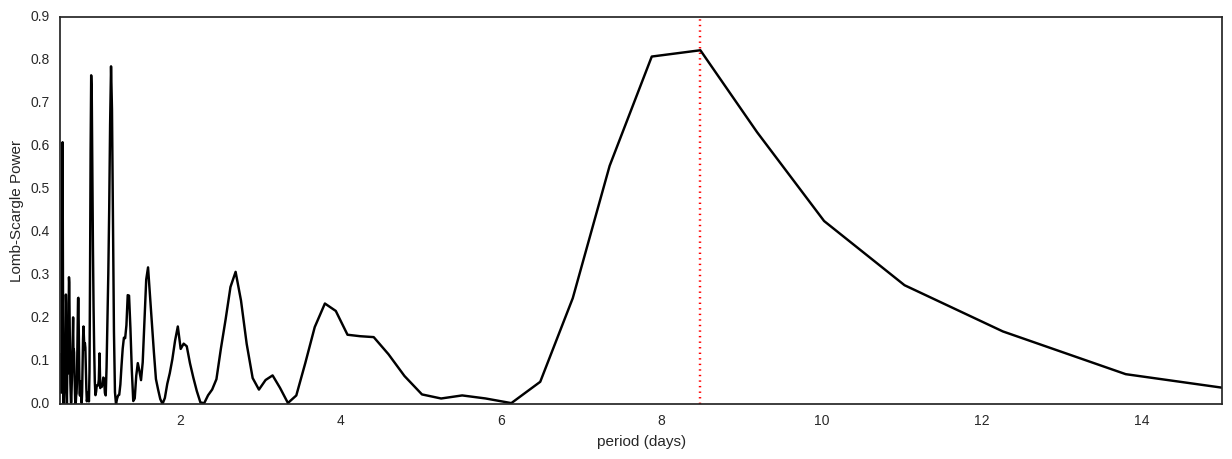

In [25]:
import gatspy
from gatspy.periodic import LombScargleFast
  
#RV2 /= np.median(df2.RV)                 #normalize

model = LombScargleFast().fit(t2a, RV2a)
periods, power = model.periodogram_auto(nyquist_factor=100)

idx1a = periods > 1
idx2a = np.argmax(power[idx1a])
peak2a = periods[idx1a][idx2a]

with sb.axes_style('white'):
    fig, ax = plt.subplots(1,1,figsize=(15,5))
    ax.plot(periods, power, 'k-')
    ax.set(xlim=(0.5, 15),
       xlabel='period (days)',
       ylabel='Lomb-Scargle Power')
    ax.vlines(peak2a, *ax.get_ylim(), linestyles='dotted', colors='r')

In [26]:
print("Period without the masked datapoints is {0:.3} days.".format(peak2a))

Period without the masked datapoints is 8.49 days.


Let's first approximate the fitting parameters for better initial guess. 

In [38]:
import scipy.optimize as opt
#opt.minimize?

K = max(RV2a)+5
def simple_sin(theta, x):
    K, P, phi, vsys = theta
    return K*np.sin(2*np.pi*(x-phi)/P)+vsys
    
def skewed(theta, x):
    K, P, phi, vsys = theta
    #return K*np.cos(2*np.pi*(x-phi)/P)+vsys
    return (K/np.pi)*np.arctan(1/np.tan((x-phi)/P))+vsys
    #return -K*np.cos((2*np.pi/P)+np.arcsin((x-phi)/P))+vsys

#skewed RV signal implies impulsive atmospheric motion
def objective(theta, xi, yi):
    model = skewed(theta, xi)
    return np.sum((model - yi)**2) #res**2


init_guess2 = [200,peak2a,0,-1600] #K,P,phi


optimize2 = opt.minimize(objective, init_guess2, args=(t2a,RV2a), method='nelder-mead')
print(optimize2)

 final_simplex: (array([[  2.08239627e+02,   8.23767072e+00,   1.27605927e-04,
         -1.57419719e+03],
       [  2.08239617e+02,   8.23767072e+00,   1.27606000e-04,
         -1.57419725e+03],
       [  2.08239635e+02,   8.23767072e+00,   1.27605862e-04,
         -1.57419714e+03],
       [  2.08239618e+02,   8.23767072e+00,   1.27605989e-04,
         -1.57419724e+03],
       [  2.08239620e+02,   8.23767072e+00,   1.27605980e-04,
         -1.57419723e+03]]), array([ 348107.60046478,  348107.60046508,  348107.60046548,
        348107.6004662 ,  348107.60046693]))
           fun: 348107.60046477651
       message: 'Optimization terminated successfully.'
          nfev: 689
           nit: 360
        status: 0
       success: True
             x: array([  2.08239627e+02,   8.23767072e+00,   1.27605927e-04,
        -1.57419719e+03])


In [39]:
for i in optimize2.x: #x is the result of opt.minimize
    print('Success={}'.format(optimize2.success))
    print("parameter optimum: {}".format(i))

Success=True
parameter optimum: 208.23962668487266
Success=True
parameter optimum: 8.2376707200244
Success=True
parameter optimum: 0.00012760592716716098
Success=True
parameter optimum: -1574.1971921745176


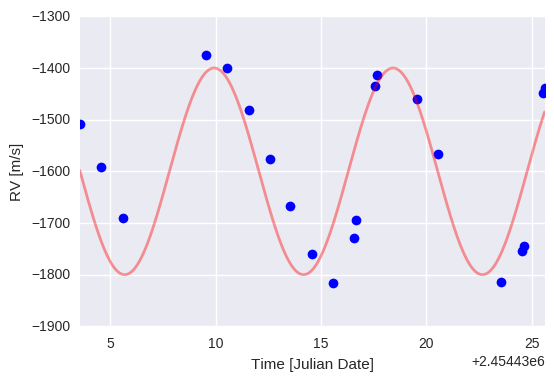

In [41]:
x2 = np.arange(t2[0],t2[cutoff2-1],0.01)
plt.plot(t2,RV2,'bo');
plt.plot(x2, simple_sin(init_guess2, x2),'r-', lw=2, alpha=0.4)
#plt.plot(x2, skewed(init_guess2, x2),'g-', lw=2, alpha=0.4)
plt.errorbar(t2a,RV2a,yerr=err2a, linestyle="None") #error bars smaller than the datapoints
plt.xlim([t2[0],t2[cutoff2-1]])
plt.xlabel('Time [Julian Date]');
plt.ylabel('RV [m/s]');

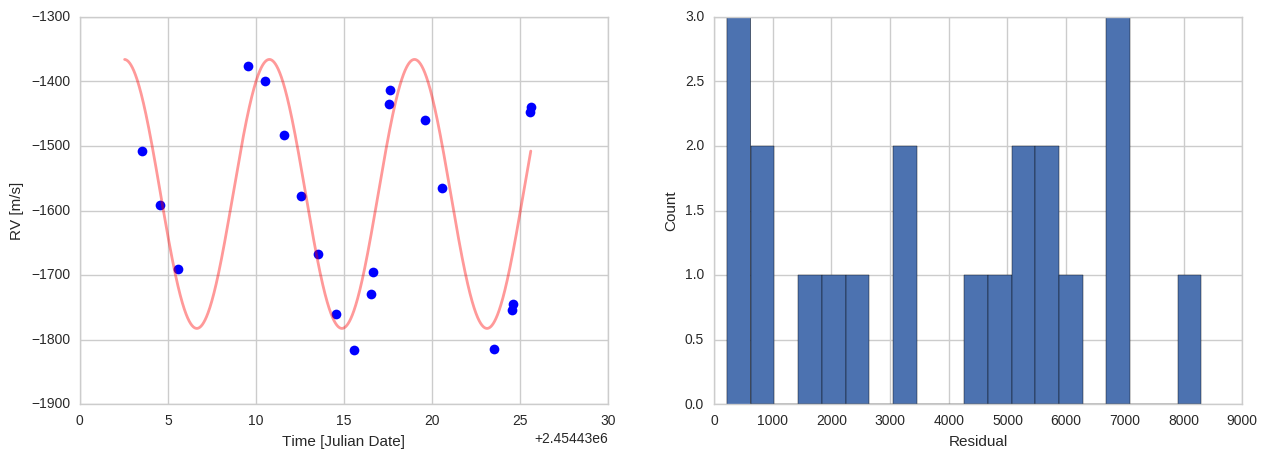

In [61]:
new_guess2 = optimize2.x

x2 = np.arange(t2[0]-1,t2[cutoff2-1],0.01)
#x2 = np.arange(t2[0]-1,t2[100],0.01)

res2=[]
for i,j in zip(t2a,RV2a): 
    res2.append(np.sum(simple_sin(new_guess2, i)-j)**2)
             
with sb.axes_style('whitegrid'):
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    ax[0].plot(t2a,RV2a,'bo')
    ax[0].plot(x2, simple_sin(new_guess2, x2),'r-', lw=2, alpha=0.4)
    #ax[0].plot(x2, skewed(new_guess2, x2),'g-', lw=2, alpha=0.4)
    ax[0].set_xlabel('Time [Julian Date]')
    ax[0].set_ylabel('RV [m/s]')
    #ax[0].set_xlim([t2[0]-1,t2[cutoff2-1]])
    #ax[0].set_xlim([t2[0]-1,t2[110]])
    ax[1].hist(res2,bins=20)
    ax[1].set_xlabel('Residual')
    ax[1].set_ylabel('Count')

In [62]:
print("The optimized period without the masked datapoints is {0:.3} days.".format(optimize2.x[1]))

The optimized period without the masked datapoints is 8.24 days.


Let's check the periodogram of the masked datapoints this time. 

I thought I'm can access the last 3 datapoints on the right by sorting t2b. But it turns out the 3 data points are in indexes= 46,47,48.

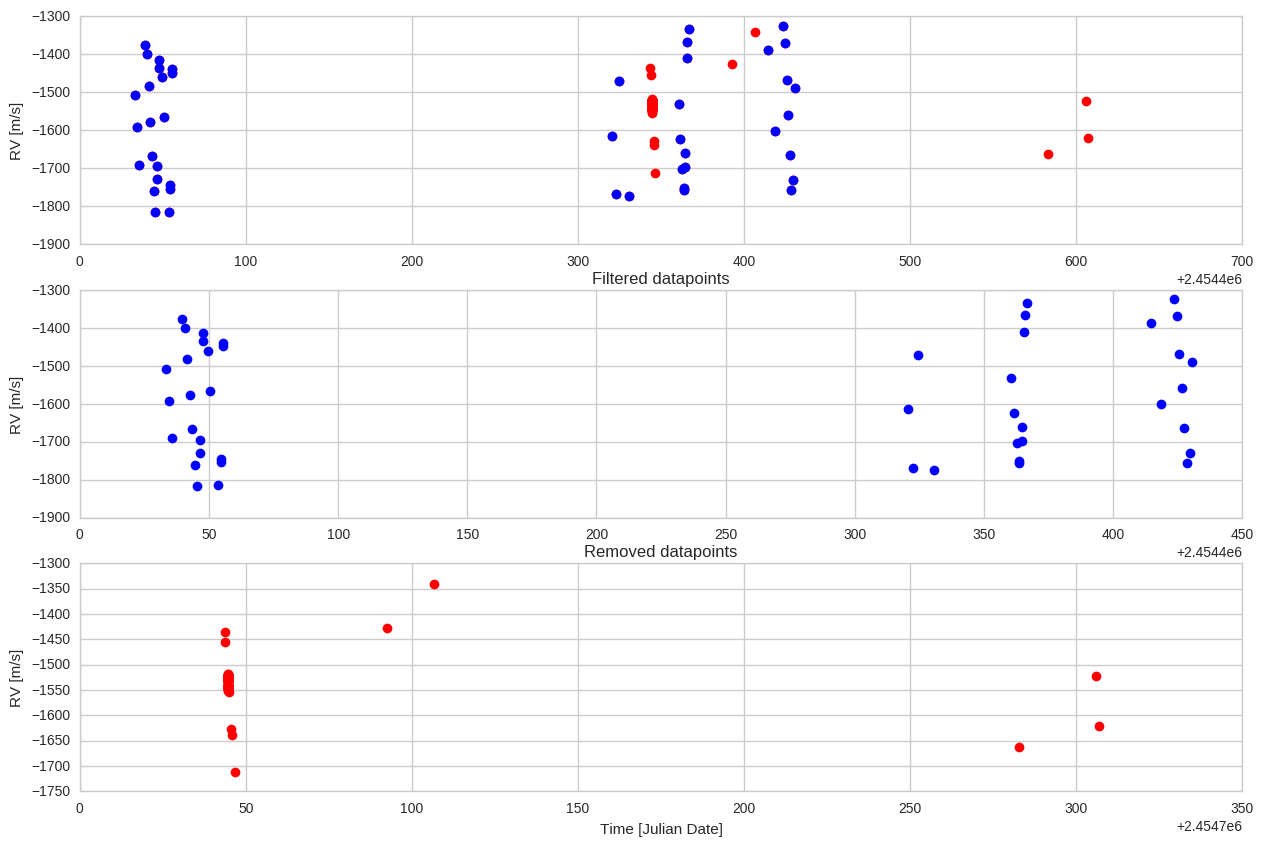

In [63]:
cutoff2b=45
#46,47,48 is the 3 last datapoints
t2b, RV2b, err2b = t2[:cutoff2b],RV2[:cutoff2b], err2[:cutoff2b]

with sb.axes_style('whitegrid'):
    fig, ax = plt.subplots(3,1,figsize=(15,10))
    ax[0].plot(t2,RV2,'ro')  #all data
    ax[0].plot(t2b,RV2b, 'bo') #color t2a and RV2a as blue
    #ax[0].set_xlabel('Time [Julian Date]')
    ax[0].set_ylabel('RV [m/s]')
    ax[1].plot(t2b,RV2b, 'bo') #Zoom the blue datapoints
    #ax[1].set_xlabel('Time [Julian Date]');
    ax[1].set_ylabel('RV [m/s]');
    ax[1].set_title('Filtered datapoints')
    ax[2].plot(t2[cutoff2b:],RV2[cutoff2b:],'ro');
    #ax[2].set_xlim([t2[cutoff2],t2[len(df2)-1]]) #take the 
    ax[2].set_xlabel('Time [Julian Date]');
    ax[2].set_ylabel('RV [m/s]');
    ax[2].set_title('Removed datapoints');

Let's now remove the last 3 datapoints and determine whether they are outliers (i.e. affect the periodicity).

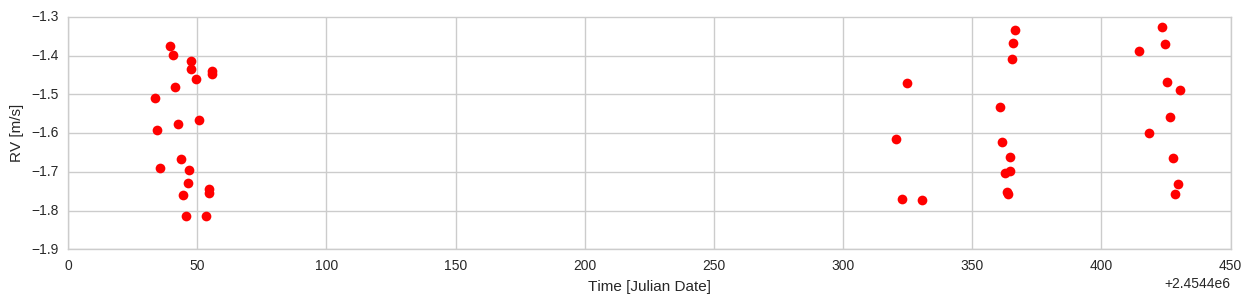

In [62]:
cutoff2b = 45
t2b, RV2b, err2b = t2[:cutoff2b],RV2[:cutoff2b], err2[:cutoff2b]
t2b.append(t2[cutoff2b+3:]) 
RV2b.append(RV2[cutoff2b+3:])
err2b.append(err2[cutoff2b+3:])

# mask = 4
# t2b, RV2b, err2b = t2[cutoff2:-mask],RV2[cutoff2:-mask], err2[cutoff2:-mask]

with sb.axes_style('whitegrid'):
    fig, ax = plt.subplots(1,1,figsize=(15,3))
    ax.plot(t2b,RV2b,'ro');
    #ax.plot(t2b[cutoff2:],RV2b[cutoff2:],'ro');
    #ax.errorbar(t2b,RV2b,yerr=err2b, linestyle="None") #error bars smaller than the datapoints
    #ax.set_xlim([t2[cutoff2],t2[len(df2)-1]]) #take the 
    ax.set_xlabel('Time [Julian Date]');
    ax.set_ylabel('RV [m/s]');

/home/dl/miniconda2/envs/transit/lib/python3.5/site-packages/gatspy/periodic/lomb_scargle_fast.py:429: UserWarning: For smaller datasets, the approximation used by LombScargleFast may not be suitable.
It is recommended to use LombScargle instead.
To silence this warning, set ``silence_warnings=True``
  warnings.warn("For smaller datasets, the approximation used by "


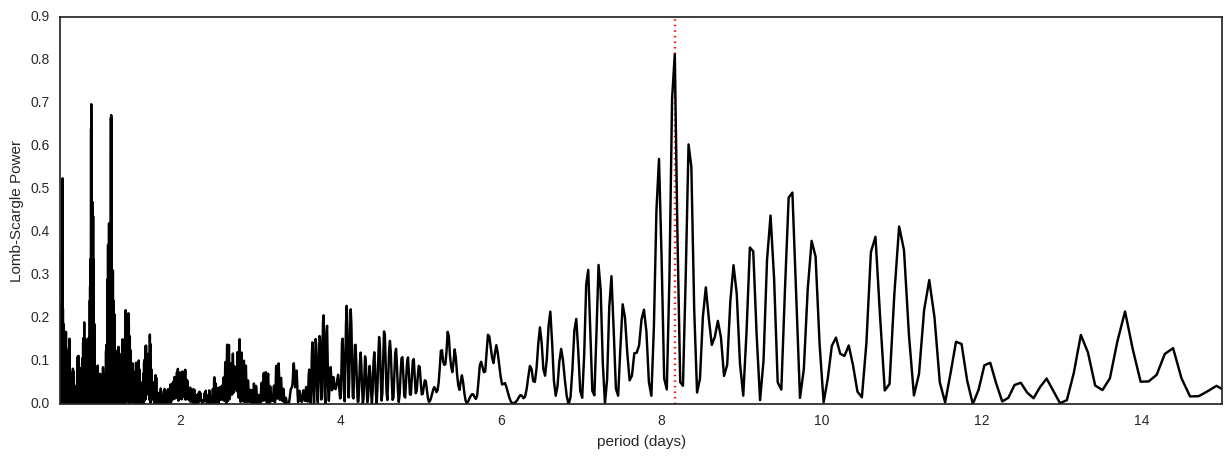

In [52]:
import gatspy
from gatspy.periodic import LombScargleFast
  
#RV2 /= np.median(df2.RV)                 #normalize

model = LombScargleFast().fit(t2b, RV2b)
periods, power = model.periodogram_auto(nyquist_factor=100)

idx1b = periods > 1
idx2b = np.argmax(power[idx1b])
peak2b = periods[idx1b][idx2b]

with sb.axes_style('white'):
    fig, ax = plt.subplots(1,1,figsize=(15,5))
    ax.plot(periods, power, 'k-')
    ax.set(xlim=(0.5, 15),
       xlabel='period (days)',
       ylabel='Lomb-Scargle Power')
    ax.vlines(peak2b, *ax.get_ylim(), linestyles='dotted', colors='r')

In [53]:
print("The period of the previously masked datapoints is {0:.3} days.".format(peak2b))

The period of the previously masked datapoints is 8.17 days.


In [54]:
print("The difference in the computed periods between the two datasets (masked & unmasked) is {} m/s.".format(peak2a-peak2b))

The difference in the computed periods between the two datasets (masked & unmasked) is 0.31926340776787043 m/s.


Since the difference is very small, it doesn't matter if we either mask or remove few outliers. Nonetheless, I will mask some dataset (because it produces nice periodogram) and then make a fit given all datapoints. 

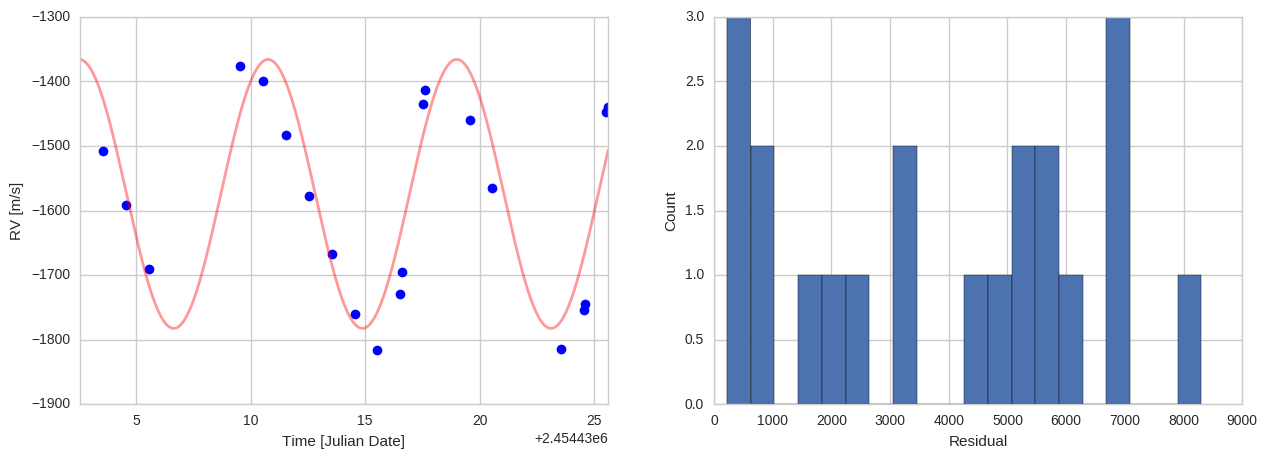

In [66]:
x2 = np.arange(t2b[0]-1,t2b[-1:]+1,0.01) #all datapoints

res2=[]
for i,j in zip(t2a,RV2a): 
    res2.append(np.sum(simple_sin(new_guess2, i)-j)**2)
             
with sb.axes_style('whitegrid'):
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    ax[0].plot(t2a,RV2a,'bo')
    ax[0].plot(x2, simple_sin(new_guess2, x2),'r-', lw=2, alpha=0.4)
    ax[0].set_xlabel('Time [Julian Date]')
    ax[0].set_ylabel('RV [m/s]')
    ax[0].set_xlim([t2[0]-1,t2[cutoff2-1]])
    ax[1].hist(res2,bins=20)
    ax[1].set_xlabel('Residual')
    ax[1].set_ylabel('Count')

## b. Assuming that this is a Sun-like star, what is the orbital radius and mass of the planet?

In [70]:
G= 6.67E-11
M_sun= 1.989E30 # in kg
M_Jup = 1.898E27 # in kg
M_Earth = 5.972E24
M_star = M_sun
au = 1.496E11 #in meters

P=optimize2.x[1]
v_star=optimize2.x[0]

M_0= 0

a = ((G*(M_star+M_0)*(P*60*60*24)**2)/(4*np.pi**2))**(1/3)
print("Semi-major axis= {0:.3} m or {1:.3} AU".format(a, a/au))

v_planet = 2*np.pi*a/P
print("v_planet= {0:.3} m/s".format(v_planet))
M_planet=M_star*abs(v_star)/v_planet

print("M_planet= {0:.3} kg or {1:.3} M_Jup or or {2:.3} M_Earth".format(M_planet, M_planet/M_Jup, M_planet/M_Earth))

Semi-major axis= 1.19e+10 m or 0.0798 AU
v_planet= 9.11e+09 m/s
M_planet= 4.55e+22 kg or 2.4e-05 M_Jup or or 0.00762 M_Earth


In [73]:
P

8.2376707200244006

## c. Bonus! This is a real exoplanet. Which one?

Isn't it possible we have multiple planets in this system? May be I can 

# 4. 
Bonus! Joe thinks that maybe, just maybe, there might a signal in the measurements of another star. He's not sure.
What do you think? 

In [2]:
import pandas as pd

filename='rv_4.dat'
df3 = pd.read_csv(filename,delim_whitespace=True)# error_bad_lines=False, skiprows=?
df3.head()

,HD,RV,error
0,2.452987e+06,26.4097,0.0024
1,2.453337e+06,26.4133,0.0018
2,2.453368e+06,26.4080,0.0010
3,2.453372e+06,26.4146,0.0012
4,2.453373e+06,26.4150,0.0011


In [14]:
len(df3)

57

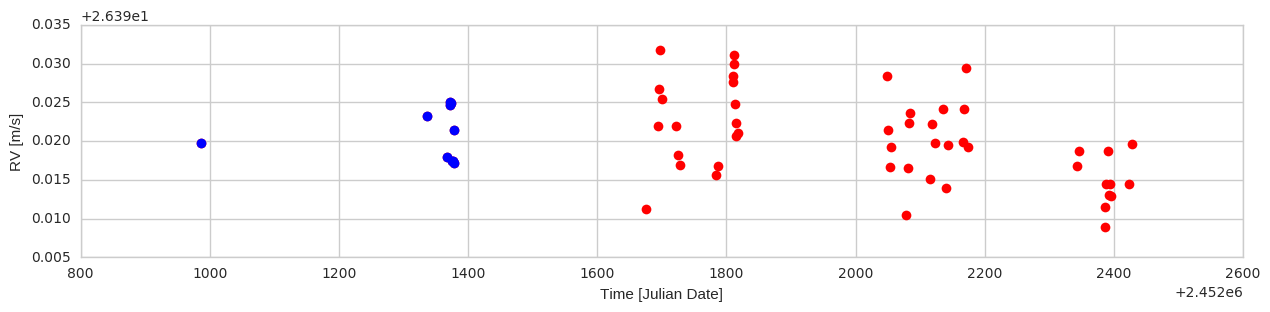

In [7]:
t3=df3.HD 
RV3=df3.RV
err3=df3.error

with sb.axes_style('whitegrid'):
    fig, ax = plt.subplots(1,1,figsize=(15,3))
    ax.plot(t3,RV3,'ro')  #all data
    ax.plot(t3a,RV3a, 'bo') #color t2a and RV2a as blue
    ax.set_xlabel('Time [Julian Date]')
    ax.set_ylabel('RV [m/s]')

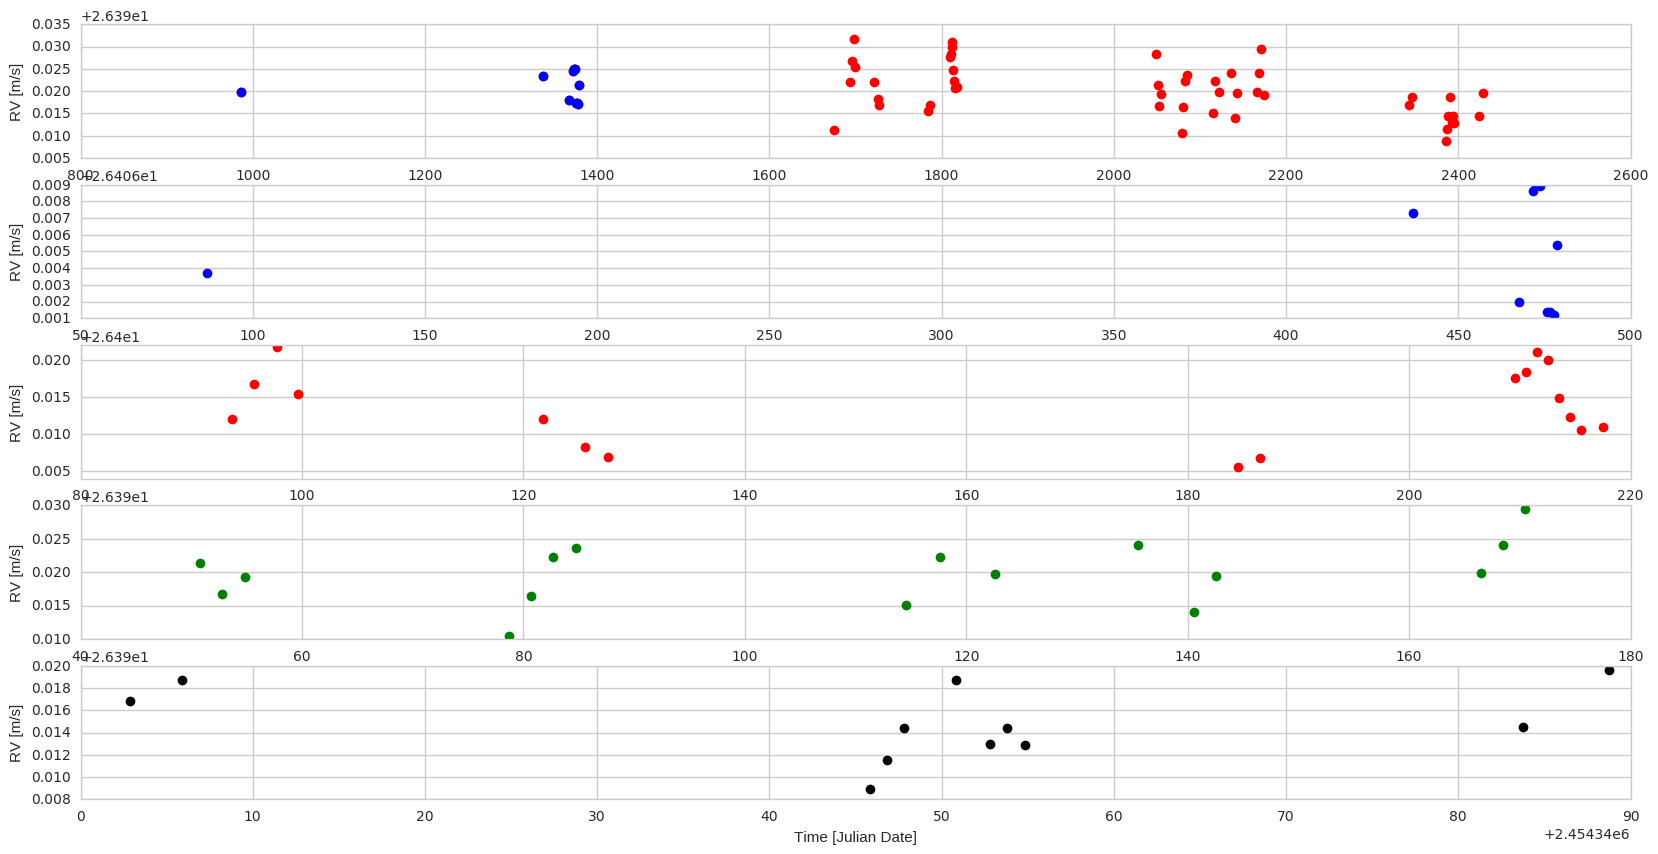

In [8]:
cutoff3a = 10
cutoff3b = 28
cutoff3c = 45

t3a, RV3a, err3a = t3[:cutoff3a],RV3[:cutoff3a], err3[:cutoff3a]
t3b, RV3b, err3b = t3[cutoff3a+1:cutoff3b],RV3[cutoff3a+1:cutoff3b], err3[cutoff3a+1:cutoff3b]
t3c, RV3c, err3c = t3[cutoff3b+1:cutoff3c],RV3[cutoff3b+1:cutoff3c], err3[cutoff3b+1:cutoff3c]
t3d, RV3d, err3d = t3[cutoff3c+1:],RV3[cutoff3c+1:], err3[cutoff3c+1:]

import seaborn as sb

with sb.axes_style('whitegrid'):
    fig, ax = plt.subplots(5,1,figsize=(20,10))
    ax[0].plot(t3,RV3,'ro')  #all data
    ax[0].plot(t3a,RV3a, 'bo') #color t2a and RV2a as blue
    #ax[0].set_xlabel('Time [Julian Date]')
    ax[0].set_ylabel('RV [m/s]')
    ax[1].plot(t3a,RV3a, 'bo') #Zoom the blue datapoints
    #ax[1].set_xlabel('Time [Julian Date]');
    ax[1].set_ylabel('RV [m/s]')
    ax[2].plot(t3b,RV3b,'ro')
    ax[2].set_xlabel('Time [Julian Date]')
    ax[2].set_ylabel('RV [m/s]')
    ax[3].plot(t3c,RV3c, 'go') #green
    ax[3].set_xlabel('Time [Julian Date]')
    ax[3].set_ylabel('RV [m/s]')
    ax[4].plot(t3d,RV3d, 'ko') #black
    ax[4].set_xlabel('Time [Julian Date]')
    ax[4].set_ylabel('RV [m/s]')    

/home/dl/miniconda2/envs/transit/lib/python3.5/site-packages/gatspy/periodic/lomb_scargle_fast.py:429: UserWarning: For smaller datasets, the approximation used by LombScargleFast may not be suitable.
It is recommended to use LombScargle instead.
To silence this warning, set ``silence_warnings=True``
  warnings.warn("For smaller datasets, the approximation used by "


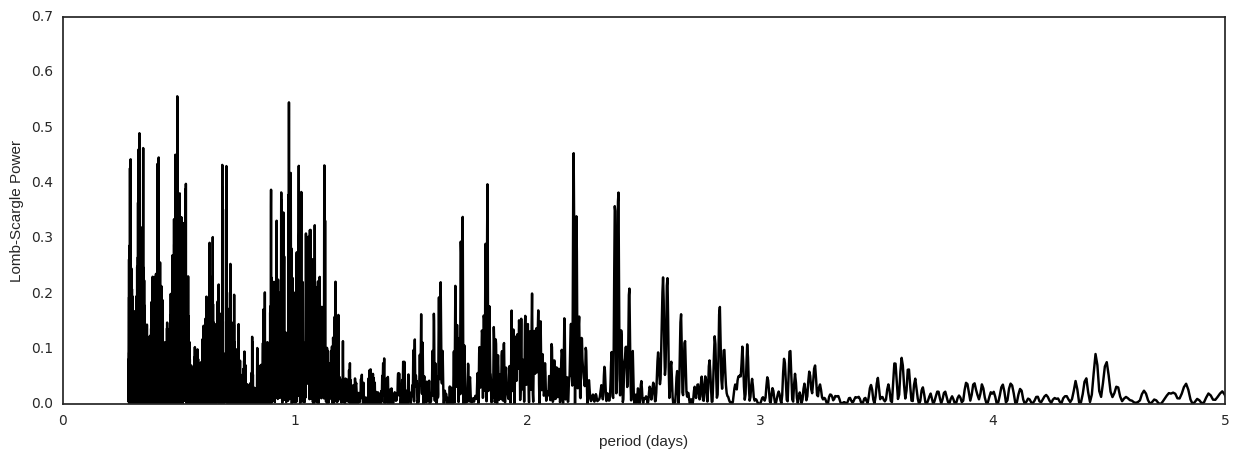

In [12]:
import gatspy
from gatspy.periodic import LombScargleFast
  
#RV2 /= np.median(df2.RV)                 #normalize

t3e, RV3e, err3e = t3[cutoff3a:cutoff3c],RV3[cutoff3a:cutoff3c], err3[cutoff3a:cutoff3c]
model = LombScargleFast().fit(t3e, RV3e)
periods, power = model.periodogram_auto(nyquist_factor=100)

idx1 = periods > 1
idx2 = np.argmax(power[idx1])
peak3 = periods[idx1][idx2]

with sb.axes_style('white'):
    fig, ax = plt.subplots(1,1,figsize=(15,5))
    ax.plot(periods, power, 'k-')
    ax.set(xlim=(0.5, 5),
       xlabel='period (days)',
       ylabel='Lomb-Scargle Power')
    ax.vlines(peak3, *ax.get_ylim(), linestyles='dotted', colors='r')

In [ ]:
import scipy.optimize as opt
#opt.minimize?

K = max(RV3b)+5
def simple_sin(theta, x):
    K, P, phi, vsys = theta
    return K*np.sin(2*np.pi*(x-phi)/P)+vsys
    
def skewed(theta, x):
    K, P, phi, vsys = theta
    #return K*np.cos(2*np.pi*(x-phi)/P)+vsys
    return (K/np.pi)*np.arctan(1/np.tan((x-phi)/P))+vsys
    #return -K*np.cos((2*np.pi/P)+np.arcsin((x-phi)/P))+vsys

#skewed RV signal implies impulsive atmospheric motion
def objective(theta, xi, yi):
    model = skewed(theta, xi)
    return np.sum((model - yi)**2) #res**2

init_guess3 = []

optimize3 = opt.minimize(objective, init_guess3, args=(t3,RV3), method='nelder-mead')
print(optimize3)

In [ ]:
print("The optimized period without the masked datapoints is {0:.3} days.".format(optimize3.x[1]))

In [ ]:
G= 6.67E-11
M_sun= 1.989E30 # in kg
M_Jup = 1.898E27 # in kg
M_Earth = 5.972E24
M_star = M_sun
au = 1.496E11 #in meters

P=p_opt[1]
v_star=p_opt[0]

M_planet= 0

a = ((G*(M_star+M_planet)*(P*60*60*24)**2)/(4*np.pi**2))**(1/3)
print("Semi-major axis= {0:.3} m or {1:.3} AU".format(a, a/au))

v_planet = 2*np.pi*a/P
print("v_planet= {0:.3} m/s".format(v_planet))
M_planet=M_star*abs(v_star)/v_planet

print("M_planet= {0:.3} kg or {1:.3} M_Jup or or {2:.3} M_Earth".format(M_planet, M_planet/M_Jup, M_planet/M_Earth))